In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_hdf('/Volumes/daviesgr-alex-phd/asterion_data/prior.hdf5')
df.head()

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_36,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname
0,profile4,152.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000006,0.000002,0.000001,7.889056e-07,6.149682e-07,15247.850269,2037.139686,0.029961,38796.631185,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
1,profile5,153.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000008,0.000002,0.000001,8.212464e-07,6.273383e-07,14809.891105,1980.528826,0.029540,37900.327592,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
2,profile6,154.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000013,0.000003,0.000001,8.515127e-07,6.398741e-07,14496.838617,1940.585790,0.029221,37222.634389,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000018,0.000003,0.000001,8.790797e-07,6.513090e-07,14220.559706,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
4,profile8,156.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000027,0.000003,0.000001,9.036751e-07,6.612813e-07,14054.932771,1883.449431,0.028860,36302.082709,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1


In [3]:
for col in ['nu_max', 'delta_nu', 'tau_he', 'tau_cz']:
    df[f'log_{col}'] = np.log10(df[col])
df.head()

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname,log_nu_max,log_delta_nu,log_tau_he,log_tau_cz
0,profile4,152.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,6.149682e-07,15247.850269,2037.139686,0.029961,38796.631185,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.204462,1.133023,4.183209,4.588794
1,profile5,153.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,6.273383e-07,14809.891105,1980.528826,0.029540,37900.327592,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.217565,1.143018,4.170552,4.578643
2,profile6,154.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,6.398741e-07,14496.838617,1940.585790,0.029221,37222.634389,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.227690,1.150734,4.161273,4.570807
3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,6.513090e-07,14220.559706,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.235572,1.156740,4.152917,4.564708
4,profile8,156.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,6.612813e-07,14054.932771,1883.449431,0.028860,36302.082709,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.241746,1.161444,4.147829,4.559932


In [4]:
df['delta_tau'] = df['log_tau_cz'] / df['log_tau_he']

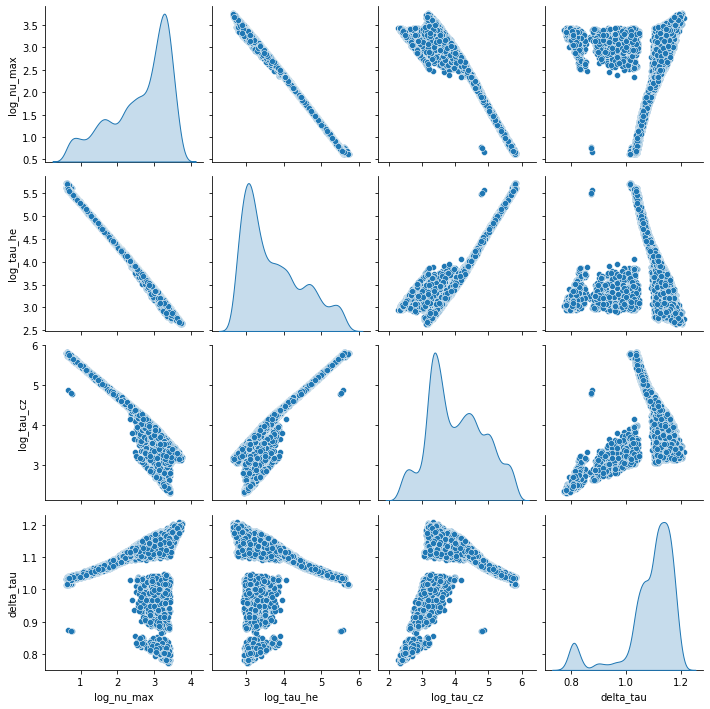

In [5]:
n = 10000
sns.pairplot(df.sample(n, ignore_index=True), 
             vars=['log_nu_max', 'log_tau_he', 'log_tau_cz', 'delta_tau'], diag_kind='kde');

In [6]:
m = 0.08/3
df['flag'] = df['delta_tau'] - (6*m + 1. - m * df['log_tau_he']) < 0

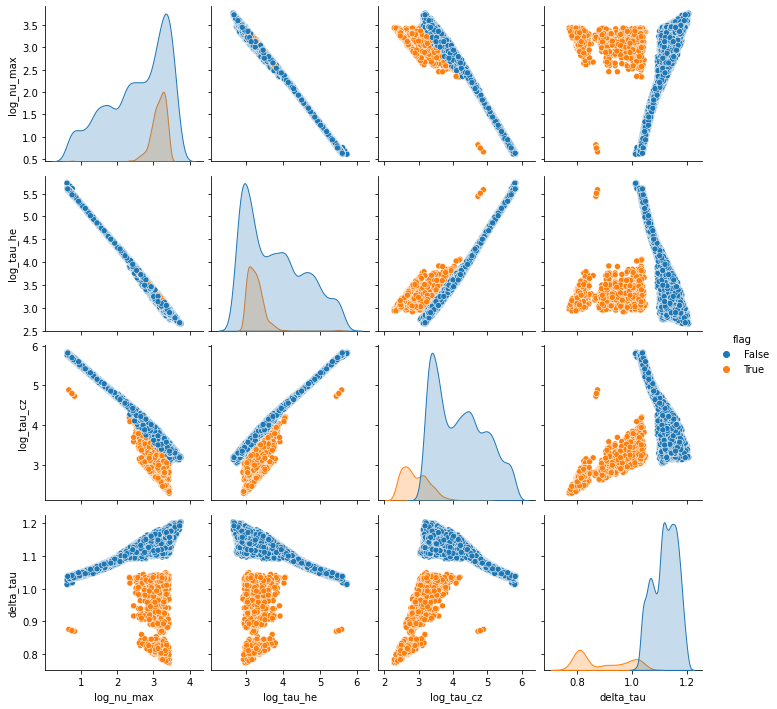

In [7]:
sns.pairplot(df.sample(n, ignore_index=True), 
             vars=['log_nu_max', 'log_tau_he', 'log_tau_cz', 'delta_tau'], hue='flag');

In [8]:
mask = (df['flag'] == False)

In [15]:
# n = 100000
frac = 0.8
train = df.loc[mask, ['log_nu_max', 'effective_T', 'log_tau_he', 'log_tau_cz']].dropna().sample(frac=frac)
x_train = train[['log_nu_max', 'effective_T']].to_numpy()
y_train = train[['log_tau_he', 'log_tau_cz']].to_numpy()

In [16]:
from asterion.nn import BayesianNN

In [18]:
bnn = BayesianNN(x_train, y_train, hidden_dim=10)

In [25]:
from numpyro import render_model
from jax import random

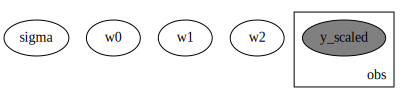

In [23]:
render_model(bnn.model, model_args=(bnn.x_train[:10], bnn.y_train[:10]))

In [26]:
rng_key = random.PRNGKey(0)
svi_key, mcmc_key = random.split(rng_key)

/Users/alyttle/Repos/alexlyttle/asterion/asterion/nn/nn.py:193: UserWarning: Missing a plate statement for batch dimension -1 at site 'y_scaled'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  svi_result = svi.run(rng_key, num_steps, self.x_train, y=self.y_train,
  0%|                                                                                                                                                                                                                                                | 0/5000 [00:00<?, ?it/s]/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/linear_util.py:166: UserWarning: Missing a plate statement for batch dimension -1 at site 'y_scaled'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))
100%|█████████████████████████████████████████████████████████████████████████████████████████████

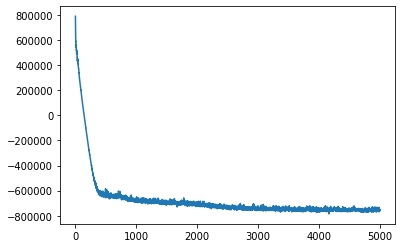

In [27]:
svi_result = bnn.optimize(svi_key, subsample_size=1000)
plt.plot(svi_result.losses);

In [31]:
# mcmc = bnn.train(mcmc_key,
#                  num_chains=1,
# #                  subsample_size=None,
#                  subsample_size=1000, num_blocks=10,
# #                  init_strategy=numpyro.infer.init_to_value(values=bnn.ref_params),
# )
# mcmc.print_summary()

In [32]:
# samples = mcmc.get_samples(group_by_chain=True)

In [34]:
# trace = az.from_dict(samples)
# az.plot_trace(trace);

In [35]:
test = df.loc[mask & (~df.index.isin(train.index))].dropna()
test

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,delta_he,amp_he,tau_cz,dirname,log_nu_max,log_delta_nu,log_tau_he,log_tau_cz,delta_tau,flag
3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.800000,...,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.235572,1.156740,4.152917,4.564708,1.099157,False
12,profile16,164.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.800000,...,1707.454616,0.027733,33858.039418,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.280894,1.191260,4.109954,4.529662,1.102120,False
19,profile23,171.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.800000,...,1590.698337,0.026971,31925.046440,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.313918,1.216414,4.078077,4.504132,1.104474,False
23,profile27,175.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.800000,...,1505.940772,0.026214,30873.223929,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.332749,1.230753,4.059747,4.489582,1.105877,False
31,profile35,183.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.800000,...,1391.009449,0.025219,28873.919985,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.370443,1.259413,4.023978,4.460506,1.108482,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253048,profile1493,2294.0,2.0,1.5,0.32,0.012089,0.0,1.9,0.0,1.494160,...,47186.430104,0.104202,538351.751578,m1.5Y0.32FeH0.0MLT1.9ov0.010777777777777778dif0,0.745026,0.014835,5.499864,5.731066,1.042038,False
253056,profile1501,2310.0,2.0,1.5,0.32,0.012089,0.0,1.9,0.0,1.493773,...,50643.001369,0.104158,584355.100116,m1.5Y0.32FeH0.0MLT1.9ov0.010777777777777778dif0,0.699316,-0.019430,5.541168,5.766677,1.040697,False
253060,profile1505,2318.0,2.0,1.5,0.32,0.012089,0.0,1.9,0.0,1.493579,...,52461.924721,0.104918,603017.720621,m1.5Y0.32FeH0.0MLT1.9ov0.010777777777777778dif0,0.681750,-0.032557,5.557081,5.780330,1.040174,False
253065,profile1510,2328.0,2.0,1.5,0.32,0.012089,0.0,1.9,0.0,1.493326,...,55377.479900,0.105859,634681.772002,m1.5Y0.32FeH0.0MLT1.9ov0.010777777777777778dif0,0.653205,-0.053922,5.583774,5.802556,1.039182,False


In [36]:
x_test = test[['log_nu_max', 'effective_T']].to_numpy()
y_test = test[['log_tau_he', 'log_tau_cz']].to_numpy()

In [38]:
rng_key, new_key = random.split(rng_key)
test_pred = bnn.predict(new_key, x_test, kind='optimized', num_samples=1000)

In [40]:
y_pred = test_pred['y']

In [41]:
mean_err = (y_test - y_pred.mean(axis=0))

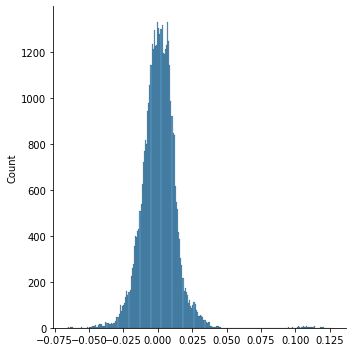

In [42]:
ax = sns.displot(x=mean_err[:, 0], kind='hist');

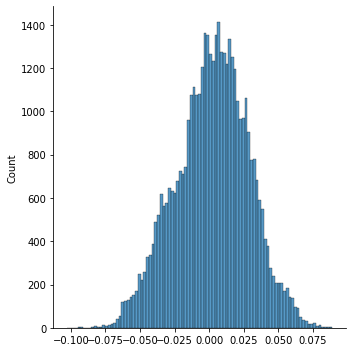

In [43]:
ax = sns.displot(x=mean_err[:, 1], kind='hist');

sigma_x / x = simga_y * ln(10)
for y = log10(x)

In [44]:
frac_err = mean_err[:, 0].std() * np.log(10)
print(f'Mean error {frac_err:.2%} in tau_he')

Mean error 2.87% in tau_he


In [45]:
frac_err = mean_err[:, 1].std() * np.log(10)
print(f'Mean error {frac_err:.2%} in tau_cz')

Mean error 6.05% in tau_cz


I.e  % error on tau_he

In [48]:
z = mean_err / y_pred.std(axis=0)
z.shape

(43640, 2)

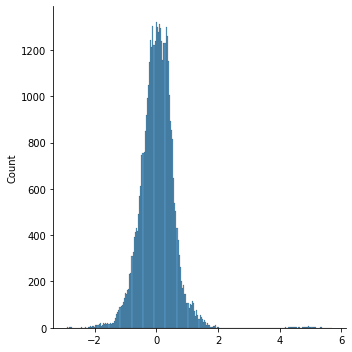

In [49]:
ax = sns.displot(x=z[:, 0], kind='hist');

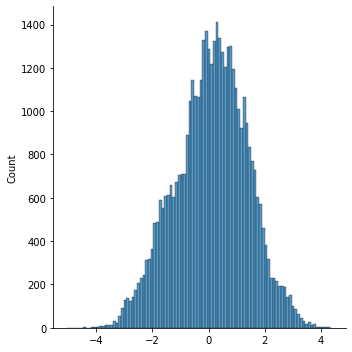

In [50]:
ax = sns.displot(x=z[:, 1], kind='hist');

In [53]:
bnn.to_file('../asterion/prior.hdf5', trained=False)

In [54]:
y_mean = y_pred.mean(axis=0)
y_std = y_pred.std(axis=0)

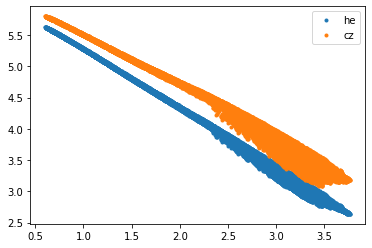

In [55]:
ax = plt.gca()
ax.plot(x_test[:, 0], y_mean, '.', label=['he', 'cz'])
ax.legend();

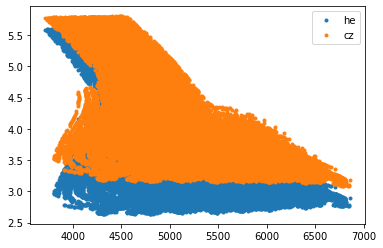

In [56]:
ax = plt.gca()
ax.plot(x_test[:, 1], y_mean, '.', label=['he', 'cz'])
ax.legend();

In [57]:
numax_obs, teff_obs = (2.9, 0.01), (3.66, 0.01)
size = 1000
numax = np.random.normal(*numax_obs, size=size)
teff = np.random.normal(*teff_obs, size=size)

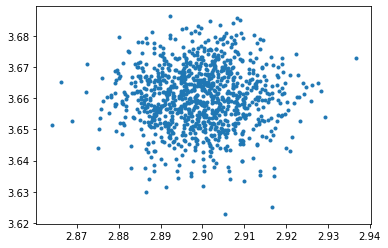

In [58]:
ax = plt.gca()
ax.plot(numax, teff, '.')

In [59]:
x_ex = np.stack([numax, teff], axis=-1)
x_ex

array([[2.89860365, 3.67015114],
       [2.90116465, 3.65867843],
       [2.90009823, 3.64062656],
       ...,
       [2.88693446, 3.64554733],
       [2.89420187, 3.6665655 ],
       [2.89531567, 3.67096662]])

In [60]:
rng_key, new_key = random.split(rng_key)
ex_pred = bnn.predict(new_key, x_ex, kind='optimized', num_samples=1000)

In [61]:
y_ex = ex_pred['y']
y_mean = y_ex.mean(axis=0)
y_std = y_ex.std(axis=0)

<ErrorbarContainer object of 3 artists>

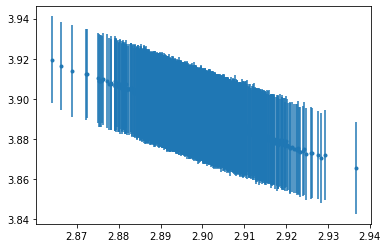

In [62]:
plt.errorbar(x_ex[:, 0], y_mean[:, 0], yerr=y_std[:, 0], fmt='.')

<ErrorbarContainer object of 3 artists>

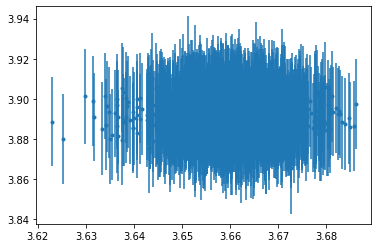

In [63]:
plt.errorbar(x_ex[:, 1], y_mean[:, 0], yerr=y_std[:, 0], fmt='.')

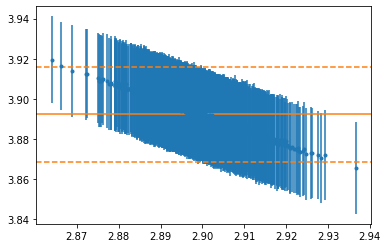

In [64]:
all_mean = y_ex[..., 0].ravel().mean()
all_std = y_ex[..., 0].ravel().std()
plt.errorbar(x_ex[:, 0] , y_ex.mean(axis=0)[:, 0], yerr=y_ex.std(axis=0)[:, 0], fmt='.')
plt.axhline(all_mean, color='C1')
plt.axhline(all_mean-all_std, color='C1', linestyle='--')
plt.axhline(all_mean+all_std, color='C1', linestyle='--')

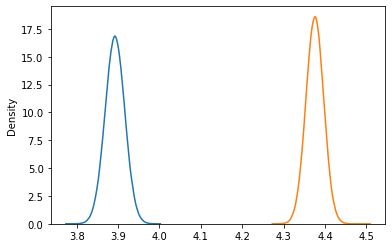

In [65]:
ax = plt.gca()
ax = sns.kdeplot(y_ex[..., 0].ravel(), ax=ax)
ax = sns.kdeplot(y_ex[..., 1].ravel(), ax=ax)

In [66]:
tau_he_mean = 10**all_mean
tau_he_std = all_std * np.log(10) * tau_he_mean

In [67]:
tau_he_mean

DeviceArray(7805.10891159, dtype=float64)

In [68]:
tau_he_std

DeviceArray(426.18247238, dtype=float64)

In [69]:
frac_err * tau_he_mean

DeviceArray(471.96903106, dtype=float64)